<a href="https://colab.research.google.com/github/joaogabrielanuto/Analise-Tecnica/blob/main/CANDLESTICKS_analise_for%C3%A7a_candlesticks_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --quiet

In [10]:
!pip install mplfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install ta --quiet

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [42]:
df_ohlc = yf.download('^BVSP', start='2000-01-01', auto_adjust='False')
df_ohlc['tam_corpo_candle'] = abs(df_ohlc['Close'] - df_ohlc['Open'])
df_ohlc['media_tam_corpo_candle'] = df_ohlc['tam_corpo_candle'].rolling(200).mean()
df_ohlc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,tam_corpo_candle,media_tam_corpo_candle
Date,,,,,,,
2000-01-03,17098.000000,17408.000000,16719.00000,16930.000000,0,168.000000,NaN
2000-01-04,16908.000000,16908.000000,15851.00000,15851.000000,0,1057.000000,NaN
2000-01-05,15871.000000,16302.000000,15350.00000,16245.000000,0,374.000000,NaN
2000-01-06,16237.000000,16499.000000,15977.00000,16107.000000,0,130.000000,NaN
2000-01-07,16125.000000,16449.000000,16125.00000,16309.000000,0,184.000000,NaN
...,...,...,...,...,...,...,...
2023-06-16,119208.000000,119555.000000,118487.00000,118758.000000,15251700,450.000000,1175.84500
2023-06-19,118757.000000,119939.000000,118558.00000,119858.000000,6776300,1101.000000,1175.18000
2023-06-20,119858.000000,119858.000000,118416.00000,119622.000000,10924200,236.000000,1176.22500


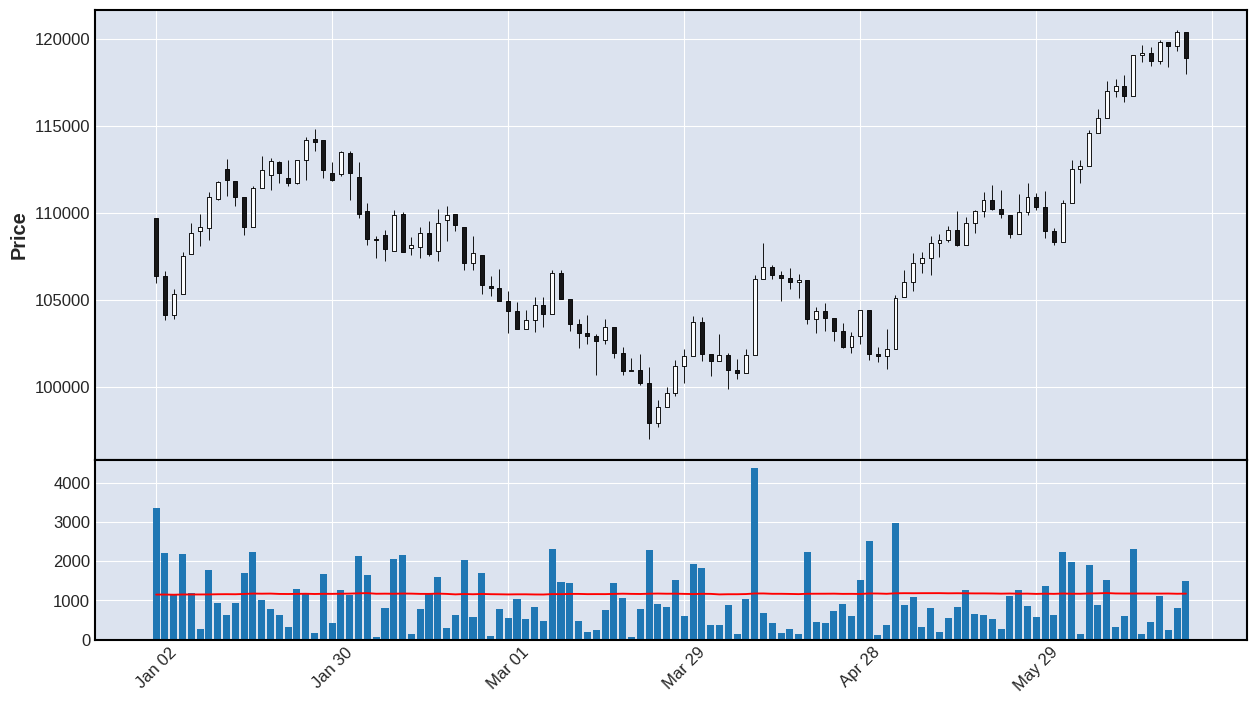

In [43]:
plot_candle = df_ohlc.loc['2023-01-01':]
plot_tam_candle = mpf.make_addplot(plot_candle['tam_corpo_candle'], panel=1, type='bar')
plot_media_tam_candle = mpf.make_addplot(plot_candle['media_tam_corpo_candle'], panel=1, color='red')

mpf.plot(plot_candle, type='candle', figsize=(16,9), addplot=[plot_tam_candle, plot_media_tam_candle])

In [45]:
df_ohlc['cond_media'] = df_ohlc['tam_corpo_candle'] > df_ohlc['media_tam_corpo_candle']
df_ohlc['razao_corpo'] = abs(df_ohlc['Close'] - df_ohlc['Open']) / abs(df_ohlc['High'] - df_ohlc['Low'])
df_ohlc.tail(30)

,Open,High,Low,Close,Volume,tam_corpo_candle,media_tam_corpo_candle,cond_media,razao_corpo
Date,,,,,,,,,
2023-05-11,107446.000000,108667.000000,106419.00000,108256.000000,12772100,810.000000,1185.64500,False,0.360320
2023-05-12,108256.000000,108817.000000,107497.00000,108464.000000,0,208.000000,1186.14000,False,0.157576
2023-05-15,108469.000000,109271.000000,108356.00000,109029.000000,11603200,560.000000,1182.22000,False,0.612022
2023-05-16,109029.000000,110151.000000,108085.00000,108194.000000,16897300,835.000000,1183.90500,False,0.404163
2023-05-17,108194.000000,109774.000000,108188.00000,109460.000000,13993000,1266.000000,1181.91000,True,0.798235
2023-05-18,109459.000000,110206.000000,108864.00000,110108.000000,13613100,649.000000,1179.35500,False,0.483607
2023-05-19,110113.000000,111211.000000,109787.00000,110745.000000,16135800,632.000000,1179.67500,False,0.443820
2023-05-22,110745.000000,111643.000000,110178.00000,110213.000000,11769400,532.000000,1177.63500,False,0.363140
2023-05-23,110213.000000,111325.000000,109713.00000,109929.000000,12334800,284.000000,1173.37000,False,0.176179


teste